# Examination of Discount Curve Interpolation Schemes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils.FinDate import FinDate
from financepy.market.curves.FinInterpolator import interpolate, FinInterpTypes
from financepy.market.curves.FinDiscountCurve import FinDiscountCurve

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  30 Oct 2020 at 11:34 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [3]:
tValues = np.array([0.01, 3.0, 5.0, 10.0]) 
rValues = np.array([0.04, 0.07, 0.08, 0.09])
dfValues = np.exp(-tValues*rValues)
tInterpValues = np.linspace(0.01, 12.0, 200)

In [4]:
print(tValues)
print(rValues)
print(dfValues)

[ 0.01  3.    5.   10.  ]
[0.04 0.07 0.08 0.09]
[0.99960008 0.81058425 0.67032005 0.40656966]


In [5]:
curveDate = FinDate(3, 1, 2019)
dates = curveDate.addYears(tValues)
interpDates = curveDate.addYears(tInterpValues)

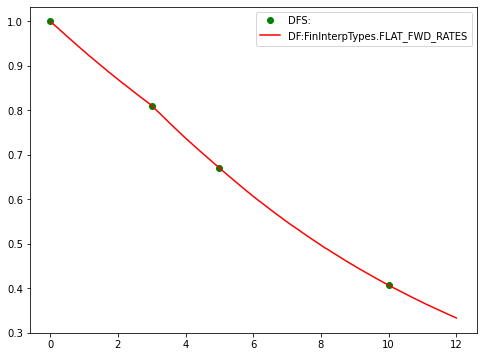

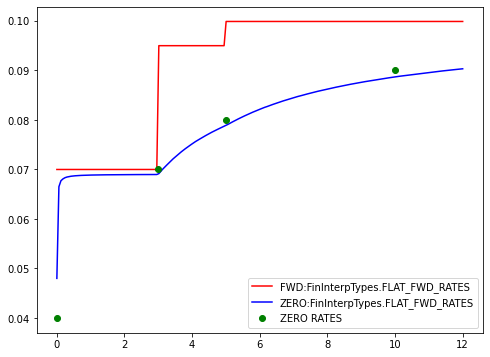

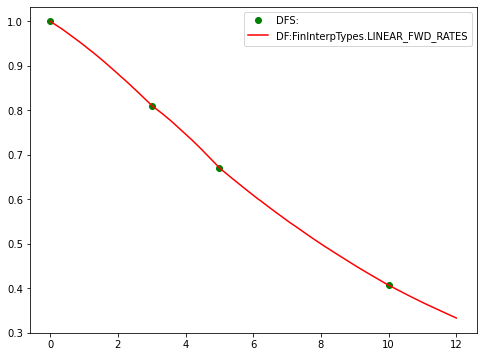

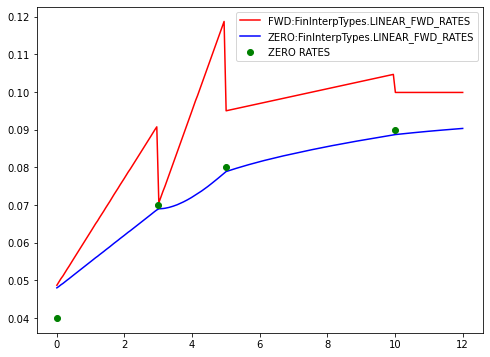

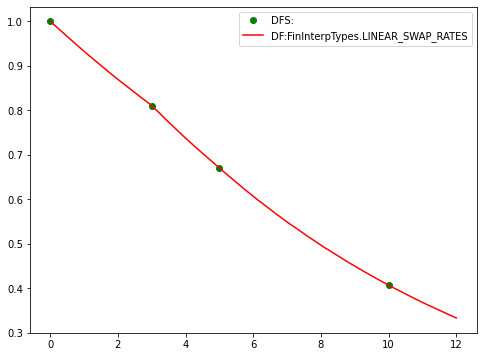

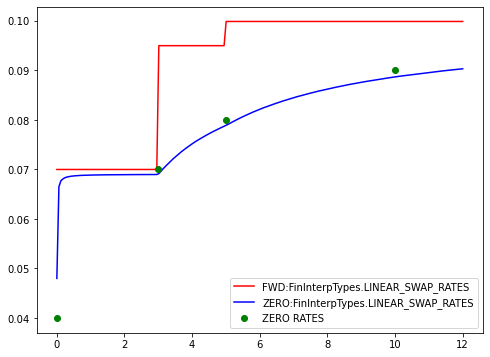

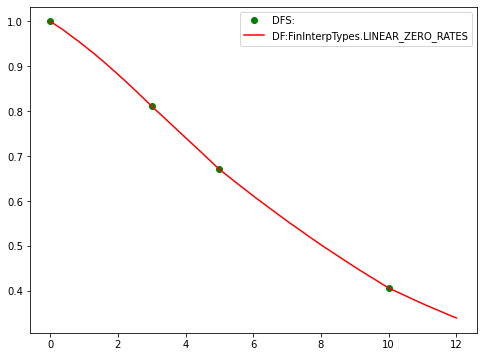

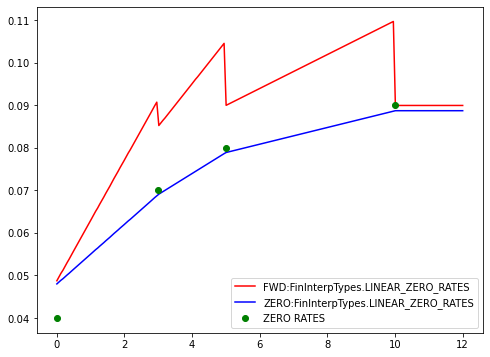

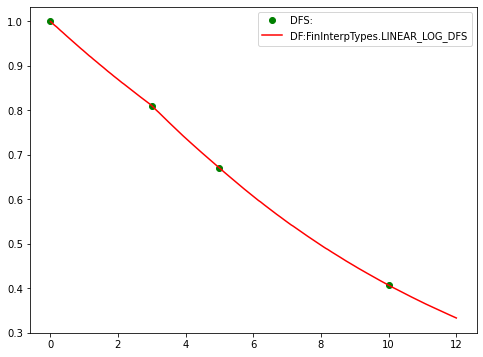

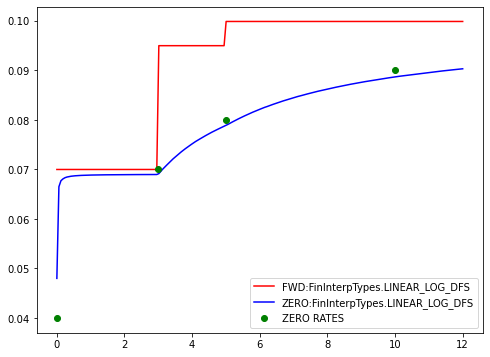

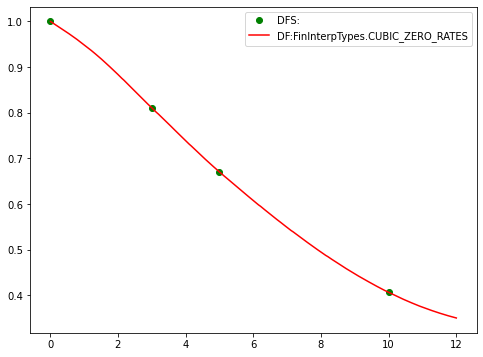

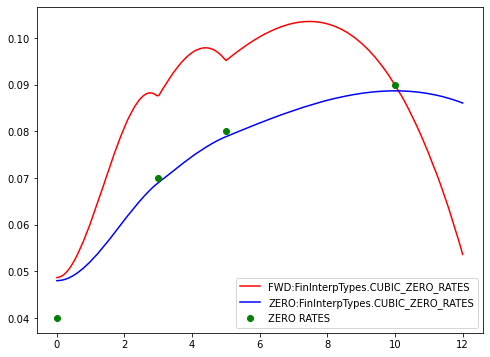

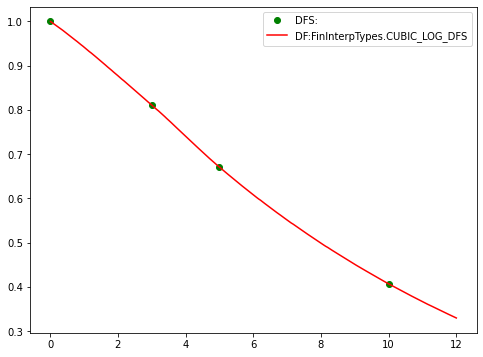

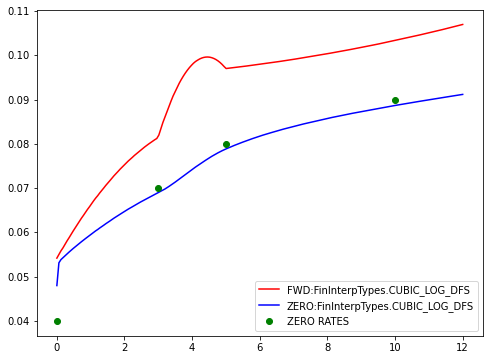

In [6]:
for method in FinInterpTypes:

    discountCurve = FinDiscountCurve(curveDate, dates, dfValues, method)

    dfInterpValues = discountCurve.df(interpDates)
    fwdInterpValues = discountCurve.fwd(interpDates)
    zeroInterpValues = discountCurve.zeroRate(interpDates)
    
    plt.figure(figsize=(8, 6))
    plt.plot(tValues, dfValues, 'o', color='g', label="DFS:")
    plt.plot(tInterpValues, dfInterpValues, color='r', label="DF:" + str(method))
    plt.legend()

    plt.figure(figsize=(8, 6))
    plt.plot(tInterpValues, fwdInterpValues, color='r', label="FWD:" + str(method))
    plt.plot(tInterpValues, zeroInterpValues, color='b', label="ZERO:" + str(method))
    plt.plot(tValues, rValues, 'o', color='g',  label="ZERO RATES")
    plt.legend()

Copyright (c) 2020 Dominic O'Kane